In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
advertising_data = pd.read_csv('Dataset/Advertising.csv', index_col =0)

In [3]:
advertising_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
advertising_data.describe(include='all')

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


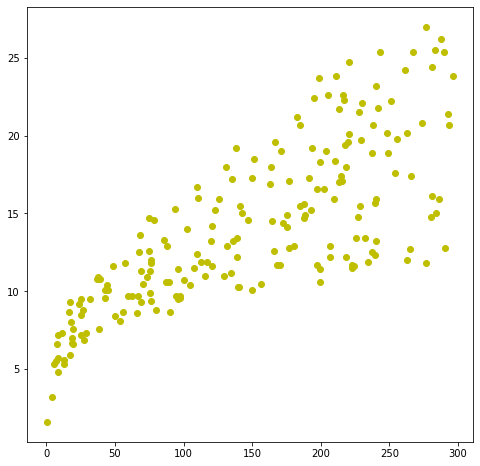

In [5]:
plt.figure(figsize = (8,8))

plt.scatter(advertising_data['TV'], advertising_data['sales'],c='y')

plt.show()

In [6]:
advertising_data_correlation = advertising_data.corr()
advertising_data_correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [7]:
advertising_data = advertising_data.dropna()

In [8]:
advertising_data.shape

(200, 4)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X = advertising_data['TV'].values.reshape(-1,1)
Y = advertising_data['sales'].values.reshape(-1,1)

In [11]:
Y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.3,random_state=0)

In [13]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train,x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           4.76e-26
Time:                        13:02:10   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

In [16]:
linear_regression = LinearRegression(normalize=True).fit(x_train,y_train)


/opt/anaconda3/envs/MachineLearning_Workbench/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [17]:
linear_regression

LinearRegression(normalize=True)

In [18]:
linear_regression.score(x_train,y_train)

0.5552336104251211

In [19]:
 y_pred = linear_regression.predict(x_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.725606346597073

<function matplotlib.pyplot.show(close=None, block=None)>

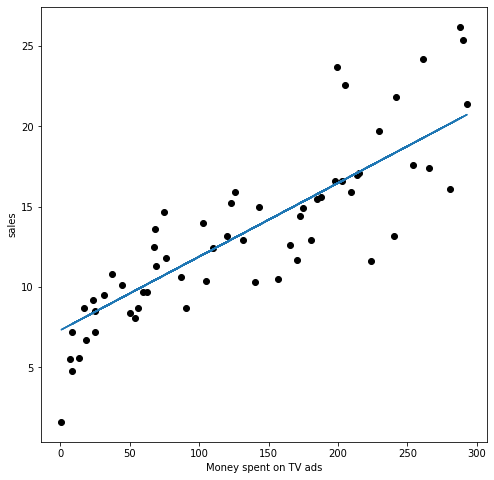

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(x_test,y_test,c='black')
plt.plot(x_test,y_pred)

plt.xlabel("Money spent on TV ads")
plt.ylabel("sales")
plt.show

In [24]:
X = advertising_data.drop(['sales'],axis=1)
Y = advertising_data['sales']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=0)

In [27]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train,x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     350.1
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           5.96e-58
Time:                        13:11:50   Log-Likelihood:                -230.84
No. Observations:                 120   AIC:                             469.7
Df Residuals:                     116   BIC:                             480.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8119      0.406      6.924      0.0

In [28]:
linear_regression = LinearRegression(normalize=True).fit(x_train,y_train)
linear_regression

/opt/anaconda3/envs/MachineLearning_Workbench/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [31]:
linear_regression.score(x_train,y_train)

0.9005511298841222

In [32]:
y_predict = linear_regression.predict(x_test)

In [34]:
r2_score(y_test,y_predict)

0.8876696235952204